In [ ]:
'''
RMSProp : The RMSprop optimizer restricts the oscillations in the vertical direction
    - AdaDelta and RMSprop both are small enhancement over AdaGrad.
    
    - Solves the problem of slower convergence is addressed by these algorithms
    
    - Instead inefficeintly storing all prevoious squared gradients, recursilvely reducing the same by averaging 
      of all the past squared gradients.which keeps learing rate optimally high.
    - Which helps to prevent the rapid growth of the denominator for dense features.

'''

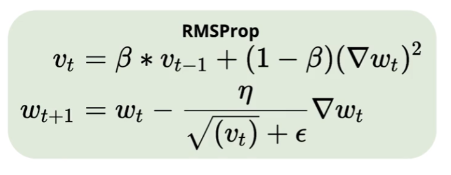

In [ ]:
'''
Variables in RMSProp 

    - V : velocity
    
    - vw and vb :Varibales used to compute the movement of the gradient based on the history as well as the current gradient.
    
    - Beta : momentum value 
    
    - Epsilon: epsilon: A small floating point value to avoid zero denominator
      (The epsilon is to avoid divide by zero error in the above equation while updating the variable when the gradient 
       is almost zero.
    
    - learnig Rate
    
    - Wt = weights (theta0 and theta1)

'''

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

X = [30, 35, 37, 59, 70, 76, 88, 100 ]
Y = [1100, 1423, 1377, 1800, 2304, 2588, 3495, 4839]

X = np.reshape(X,(-1,1))
Y = np.reshape(Y,(-1,1))

scaler = MinMaxScaler()
scaler.fit(X)
Y = scaler.transform(X)

In [5]:
iteration = []
loss = []
epoch = []

theta0 = 0
theta1 = 0

beta = 0.9

lr =0.1

eps = 1e-8 # Epsilon
vb,vw =0,0

for epoch in range(100):
    iteration.append(epoch)
    
    dtheta0 =0
    dtheta1 =0
    
    
    for x,y in zip(X,Y):
        
        # pedict theoutput
        predicted = theta0 + x * theta1
        
        n = 1 # one Sample
        dtheta0 += (-(2/n) * np.sum(np.subtract(y,predicted)))
        dtheta1 += (-(2/n) * np.sum(np.multiply(np.subtract(y,predicted),x)))
        
    vb = beta * vb + (1 - beta) * dtheta0**2
    vw = beta * vw + (1 - beta) * dtheta1**2
    
    theta0 = theta0 - (lr / np.sqrt(vb) + eps) * dtheta0
    theta1 = theta1 - (lr / np.sqrt(vw) + eps) * dtheta1
    
     # pedict theoutput
    predicted = theta0 + x * theta1
    
    cost = np.mean((Y - predicted))
    loss.append(cost)

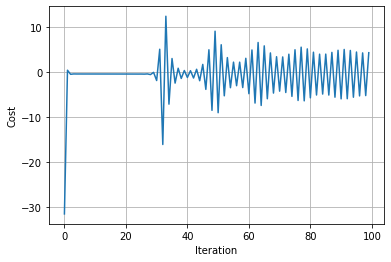

In [6]:
import matplotlib.pyplot as plt

plt.plot(iteration,loss)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid()

In [ ]:
# Example : 2

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\concrete_data.csv")

df.head(2)

,cement_component,furnace_slag,flay_ash,water_component,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


In [10]:
X = df.drop(['concrete_strength'],axis=1).values

y = df['concrete_strength'].values

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

learningrate = 0.1

m = len(y)

ones = np.ones((m,1)) 
X = np.hstack((ones, X)) 
y = y[:,np.newaxis] 

theta = np.zeros(( X.shape[1],1))

theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [11]:
# RMSProp

m = len(X)
epochs = 1000
gamma = 0.1 # momentun
eta = 0.1 # Learning rate
eps = 1e-8
beta = 0.9

v_b,v_w = 0,0

iteration_mom = []
loss_history_mom = []


In [12]:
for epoch in range(1000):
    iteration_mom.append(epoch)
    
    # Prediction
    y_pred = np.dot(X,theta)

    # Error
    error = y_pred-y

    # Compute loss function
    cost = np.sum((error)**2,axis=0)[0]

    loss_history_mom.append(cost)

    # b = theta[:0]
    # w = theta[1:]
    # db = dtheta[:0]
    # dw = dtheta[1:]

    dtheta = 1/m*np.sum((X.dot(theta)-y)*X,axis=0).reshape(-1,1)

    v_b = beta * v_b + (1 - beta) * dtheta[:0]**2
    v_w = beta * v_w + (1 - beta) * dtheta[1:]**2

    theta[:0] = theta[:0] - (eta / np.sqrt(v_b) + eps) * dtheta[:0]
    theta[1:] = theta[1:] - (eta / np.sqrt(v_w) + eps) * dtheta[1:]


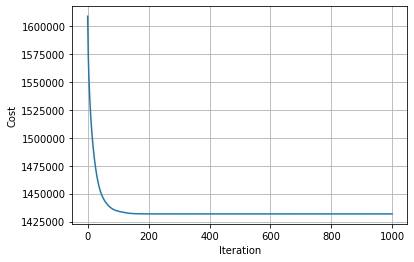

In [13]:
import matplotlib.pyplot as plt
plt.plot(iteration_mom,loss_history_mom)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid()